In [13]:
import os
import rnnSMAP
import matplotlib.pyplot as plt
import numpy as np
import imp
import matplotlib
imp.reload(rnnSMAP)
rnnSMAP.reload()

#################################################
# intend to test huc vs huc
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['OutSigma_L3_NA']

# hucStrLst = ['02', '05', '18']  # [ref, close, far]
# hucStrLst = ['13', '15', '03']  # [ref, close, far]
hucStrLst = ['16', '14', '12']  # [ref, close, far]
drLst = [0.2, 0.5, 0.8]

hucLst = np.asarray(hucStrLst, dtype=int)-1
saveFolder = os.path.join(
    rnnSMAP.kPath['dirResult'], 'paperSigma')
caseStr = ''.join(hucStrLst)
hucLegLst = [hucStrLst[0]+' (train)',
             hucStrLst[1]+' (close)',
             hucStrLst[2]+' (far)']
legStrLst = list()
for iHuc in range(0, 3):
    for dr in drLst:
        if iHuc == 0:
            hucStr = 'train'
        if iHuc == 1:
            hucStr = 'close'
        if iHuc == 2:
            hucStr = 'far'
        legStr = hucStrLst[iHuc]+' '+hucStr+' dr='+str(dr)
        legStrLst.append(legStr)


#################################################
# load data and plot map
dsLst = list()
statErrLst = list()
statSigmaLst = list()
statConfLst = list()
for k in range(0, len(hucLst)):
    testName = 'hucn1_'+str(hucLst[k]+1).zfill(2)+'_v2f1'
    trainName = 'hucn1_'+str(hucLst[0]+1).zfill(2)+'_v2f1'
    dsTemp = list()
    statErrTemp = list()
    statSigmaTemp = list()
    statConfTemp = list()
    for dr in drLst:
        if dr == 0.5:
            out = trainName+'_y15_Forcing'
        else:
            drStr = '%02d' % (dr*100)
            out = trainName+'_y15_Forcing_dr'+drStr
        ds = rnnSMAP.classDB.DatasetPost(
            rootDB=rootDB, subsetName=testName, yrLst=[2016, 2017])
        ds.readData(var='SMAP_AM', field='SMAP')
        ds.readPred(rootOut=rootOut, out=out, drMC=100, field='LSTM')
        statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
        statSigma = ds.statCalSigma(field='LSTM')
        statConf = ds.statCalConf(predField='LSTM', targetField='SMAP')
        dsTemp.append(ds)
        statErrTemp.append(statErr)
        statSigmaTemp.append(statSigma)
        statConfTemp.append(statConf)
    dsLst.append(dsTemp)
    statErrLst.append(statErrTemp)
    statSigmaLst.append(statSigmaTemp)
    statConfLst.append(statConfTemp)

load rnnSMAP
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/hucn1_16_v2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.047257184982299805
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.04109668731689453
running test
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/hucn1_16_v2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/APCP_FORA.csv 0.043918609619140625
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/APCP_FORA.csv 0.04271340370178223
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/DLWRF_FORA.csv 0.048775672912597656
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/DLWRF_FORA.csv 0.04837322235107422
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/DSWRF_FORA.csv 0.05016756057739258
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/DSWRF_FORA.csv 0.03914618492126465
read /mnt/sdc/rnnSM

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_22.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_22.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_23.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_23.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_24.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_24.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_25.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_52.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_52.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_53.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_53.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_54.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_54.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_55.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_82.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_82.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_83.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_83.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_84.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_84.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_85.csv
saving /mnt/sdb/rnnSMAP/Outpu

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_25.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_26.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_27.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_28.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_29.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_30.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_31.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_95.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_96.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_97.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_98.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_99.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_0.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_1.csv
reading /mnt/sdb/rnnSMAP/Outpu

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_63.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_64.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_65.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_66.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_67.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_68.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_69.csv
reading /mnt/

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_2.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_2.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_3.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_3.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_4.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_4.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_5.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPg

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_32.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_32.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_33.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_33.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_34.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_34.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_35.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_62.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_62.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_63.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_63.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_64.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_64.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_65.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_92.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_92.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_93.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_93.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_94.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_94.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_95.csv
saving /mnt/sdb/rnnSMAP/Outpu

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_51.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_52.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_53.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_54.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_55.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_56.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drMC_57.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_23.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_24.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_25.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_26.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_27.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_28.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_29.csv
reading /mnt/

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_83.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_84.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_85.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_86.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_87.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_88.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_16_v2f1_2016_2017_ep500_drM100/drSigma_89.csv
reading /mnt/

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_13.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_14.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_14.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_15.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_15.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_16.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_16.csv
saving /mnt/sdb/rnnSMAP/Output_S

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_43.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_44.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_44.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_45.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_45.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_46.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_46.csv
saving /mnt/sdb/rnnSMAP/Output_S

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_73.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_74.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_74.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_75.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_75.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_76.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_76.csv
saving /mnt/sdb/rnnSMAP/Output_S

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_14.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_15.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_16.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_17.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_18.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_19.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_20.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_80.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_81.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_82.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_83.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_84.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_85.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_86.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_59.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_60.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_61.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_62.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_63.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_64.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_65.csv
reading /mnt/

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/testSigma_hucn1_14_v2f1_2016_2017_ep500.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_0.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_0.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_1.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_1.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_2.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_29.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_29.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_30.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_30.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_31.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_31.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_32.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_59.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_59.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_60.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_60.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_61.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_61.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_62.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_89.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_89.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_90.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_90.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_91.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_91.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_92.csv
saving /mnt/sdb/rnnSMAP/Outpu

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_50.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_51.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_52.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_53.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_54.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_55.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drMC_56.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_10.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_11.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_12.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_13.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_14.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_15.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_16.csv
reading /mnt/

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_73.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_74.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_75.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_76.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_77.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_78.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_14_v2f1_2016_2017_ep500_drM100/drSigma_79.csv
reading /mnt/

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_8.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_8.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_9.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_9.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_10.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_10.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_11.csv
saving /mnt/sdb/rnnSMAP/Output_SM

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_38.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_38.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_39.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_39.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_40.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_40.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_41.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_68.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_68.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_69.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_69.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_70.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_70.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_71.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_98.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_98.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_99.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_99.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/testSigma_hucn1_12_v2f1_2016_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_0.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_58.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_59.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_60.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_61.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_62.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_63.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_64.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_27.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_28.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_29.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_30.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_31.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_32.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_33.csv
reading /mnt/

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_95.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_96.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_97.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_98.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr20/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_99.csv
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/hucn1_12_v2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.037933349609375
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.0377504825592041
reading /mnt/sdb/rnnSMAP/Out

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_18.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_18.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_19.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_19.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_20.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_20.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_21.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_48.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_48.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_49.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_49.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_50.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_50.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_51.csv
saving /mnt/sdb/rnnSMAP/Outpu

saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_78.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_78.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_79.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_79.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_80.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_80.csv
saving /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_81.csv
saving /mnt/sdb/rnnSMAP/Outpu

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_19.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_20.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_21.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_22.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_23.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_24.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_25.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_79.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_80.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_81.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_82.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_83.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_84.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drMC_85.csv
reading /mnt/sdb/rnnSMAP/Output_SM

reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_46.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_47.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_48.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_49.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_50.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_51.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/hucn1_16_v2f1_y15_Forcing_dr80/test_hucn1_12_v2f1_2016_2017_ep500_drM100/drSigma_52.csv
reading /mnt/

/home/kxf227/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


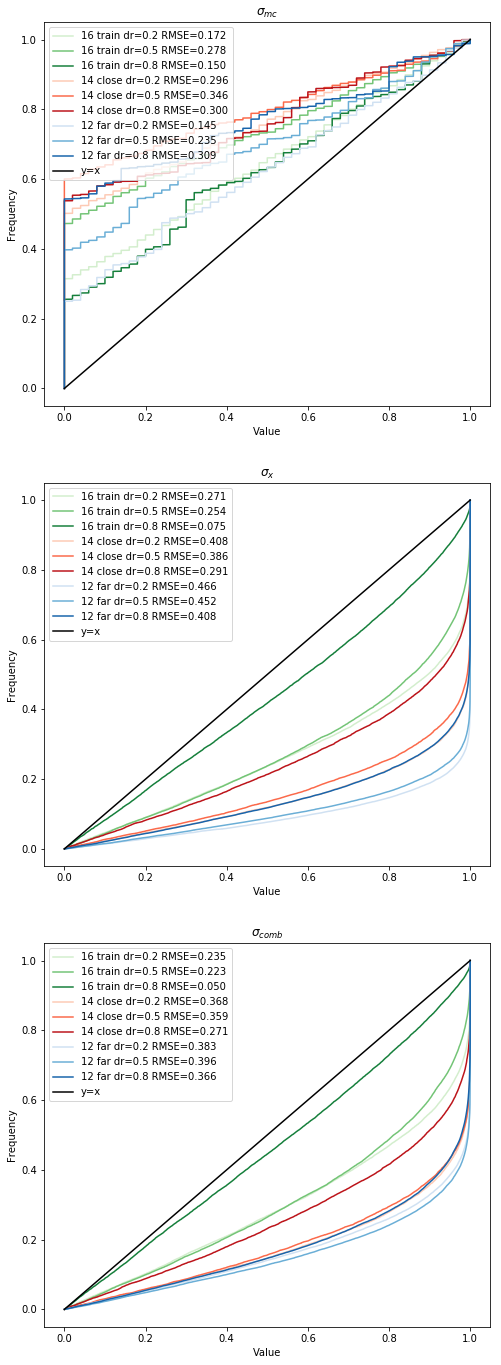

In [14]:
#################################################
# plot conf
strConfLst = ['conf_sigmaMC', 'conf_sigmaX', 'conf_sigma']
titleLst = [r'$\sigma_{mc}$', r'$\sigma_{x}$', r'$\sigma_{comb}$']
fig, axes = plt.subplots(nrows=len(strConfLst), figsize=(8, 24))
cTuple = (plt.cm.Greens(drLst), plt.cm.Reds(drLst), plt.cm.Blues(drLst))
cLst = np.concatenate(cTuple, axis=0)
for k in range(0, len(strConfLst)):
    plotLst = list()
    for iHuc in range(0, 3):
        for iDr in range(0, len(drLst)):
            temp = getattr(statConfLst[iHuc][iDr], strConfLst[k])
            plotLst.append(temp)
    rnnSMAP.funPost.plotCDF(
        plotLst, ax=axes[k], cLst=cLst, legendLst=legStrLst)
    axes[k].set_title(titleLst[k])
saveFile = os.path.join(saveFolder, caseStr+'_conf.png')
fig.show()
# fig.savefig(saveFile, dpi=600)

In [ ]:
#################################################
#plot box
data = list()
strSigmaLst = ['sigmaMC', 'sigmaX', 'sigma']
strErrLst = ['ubRMSE', 'Bias']
for strSigma in strSigmaLst:
    temp = list()
    for k in range(0, len(hucLst)):
        statSigma = statSigmaLst[k]
        temp.append(getattr(statSigma, strSigma))
    data.append(temp)
for strErr in strErrLst:
    temp = list()
    for k in range(0, len(hucLst)):
        statErr = statErrLst[k]
        temp.append(getattr(statErr, strErr))
    data.append(temp)
labelC = [r'$\sigma_{mc}$', r'$\sigma_{x}$',
          r'$\sigma_{comb}$', 'ubRMSE', 'Bias']
fig = rnnSMAP.funPost.plotBox(
    data, labelS=legendLst, labelC=labelC,
    colorLst='rgb', figsize=(12, 4), sharey=False)
fig.subplots_adjust(wspace=0.5)
saveFile = os.path.join(saveFolder, caseStr+'_box')
fig.savefig(saveFile, dpi=600)